<a href="https://colab.research.google.com/github/rkgupta7463/ML-projects-code/blob/main/zomato_restaurants_price_prediction(data_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-restaurants-dataset-for-metropolitan-areas/zomato_dataset.csv


In [ ]:
df=pd.read_csv('/kaggle/input/zomato-restaurants-dataset-for-metropolitan-areas/zomato_dataset.csv')

In [ ]:
df.shape

(123657, 12)

In [ ]:
df.head()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
0,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Platter Kebab Combo,BESTSELLER,84,249.0
1,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Rumali Shawarma,BESTSELLER,45,129.0
2,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken Tandoori Salad,NaN,39,189.0
3,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Chicken BBQ Salad,BESTSELLER,43,189.0
4,Doner King,3.9,4.2,39,0,Fast Food,Malakpet,Hyderabad,Special Doner Wrap Combo,MUST TRY,31,205.0


In [ ]:
df.tail()

,Restaurant Name,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Cuisine,Place Name,City,Item Name,Best Seller,Votes,Prices
123652,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Reshmi Kebab,NaN,0,525.0
123653,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Large Tikka,NaN,0,525.0
123654,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Chukandri Tikka,NaN,0,525.0
123655,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Murgh Golden Kebab,NaN,0,525.0
123656,Ariena Boutique Hotel,3.9,4.2,13,523,Pizza,Purena,Raipur,Gosht Gilawat Chop,BESTSELLER,0,595.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [ ]:
df.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,91421.000000,122377.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.822264,3.963184,152.729858,115.763725,24.666772,241.378399
std,0.408693,0.245900,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.600000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.900000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.100000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000



## Data Preparation

1. Data Cleaning
2. Data Exporation & Data Visualization


**1. Data Cleaning**

In [ ]:
df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

In [ ]:
dr_m=np.floor(df['Dining Rating'].mean())

In [ ]:
df['Dining Rating']=df['Dining Rating'].fillna(dr_m)

In [ ]:
df['Dining Rating'].isnull().sum()

0

In [ ]:
dr_mean=np.ceil(df['Delivery Rating'].mean())

In [ ]:
df['Delivery Rating']=df['Delivery Rating'].fillna(dr_mean)

In [ ]:
df['Delivery Rating'].isnull().sum()

0

In [ ]:
df['Best Seller'].isnull().sum()

95715

In [ ]:
df['Best Seller'].mode()

0    BESTSELLER
Name: Best Seller, dtype: object

In [ ]:
df['Best Seller']=df['Best Seller'].fillna('BESTSELLER')

In [ ]:
df['Best Seller'].isnull().sum()

0

In [ ]:
df.isnull().sum()

Restaurant Name    0
Dining Rating      0
Delivery Rating    0
Dining Votes       0
Delivery Votes     0
Cuisine            0
Place Name         0
City               0
Item Name          0
Best Seller        0
Votes              0
Prices             0
dtype: int64

In [ ]:
df.describe()

,Dining Rating,Delivery Rating,Dining Votes,Delivery Votes,Votes,Prices
count,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000,123657.000000
mean,3.607909,3.963565,152.729858,115.763725,24.666772,241.378399
std,0.503782,0.244653,232.214061,243.970828,125.236009,192.830713
min,2.500000,2.500000,0.000000,0.000000,0.000000,0.950000
25%,3.000000,3.800000,0.000000,0.000000,0.000000,130.000000
50%,3.700000,4.000000,30.000000,0.000000,0.000000,208.570000
75%,4.000000,4.100000,217.000000,23.000000,15.000000,299.000000
max,4.800000,4.600000,997.000000,983.000000,9750.000000,12024.000000


**2. Data Explorations & Visualization**

In [ ]:
##importing the required library
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df.corr()['Prices']

/tmp/ipykernel_32/2138452154.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Prices']


Dining Rating      0.034381
Delivery Rating    0.053782
Dining Votes       0.016136
Delivery Votes     0.007060
Votes             -0.058036
Prices             1.000000
Name: Prices, dtype: float64

/tmp/ipykernel_32/3245266650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


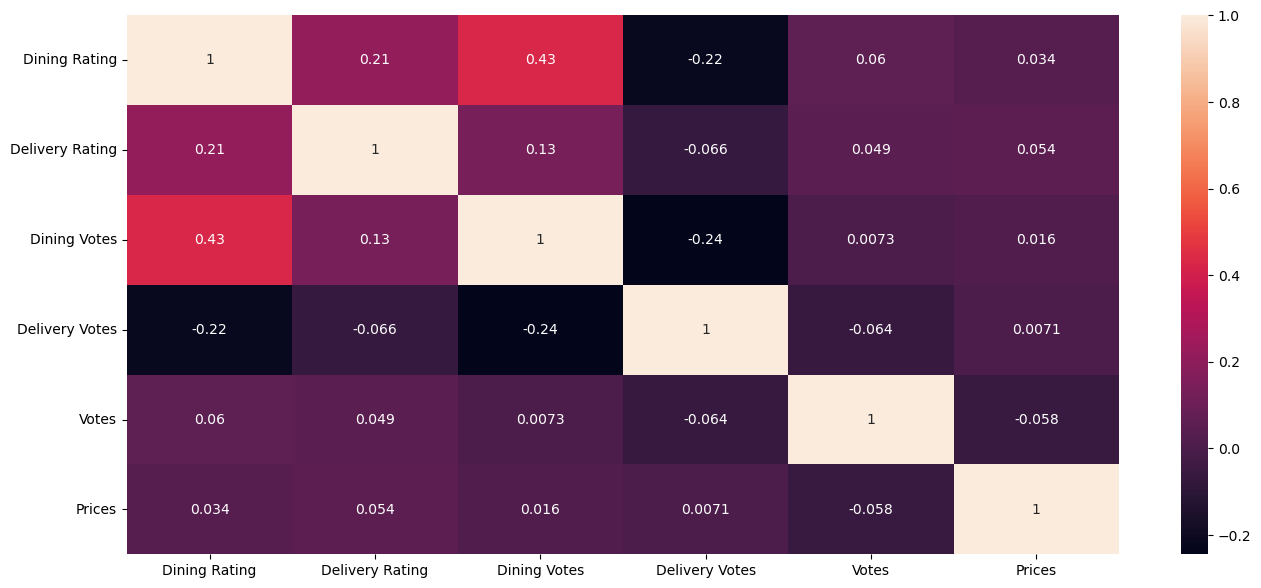

In [ ]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

#### **We will be going remove votes columns because it will not impact on predict**

In [ ]:
df=df.drop(columns='Votes')

In [ ]:
df.shape

(123657, 11)

In [ ]:
len(df['Item Name'].unique())

55693

In [ ]:
num_var=[]
cat_var=[]

for i in df:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        num_var.append(i)
    else:
        cat_var.append(i)

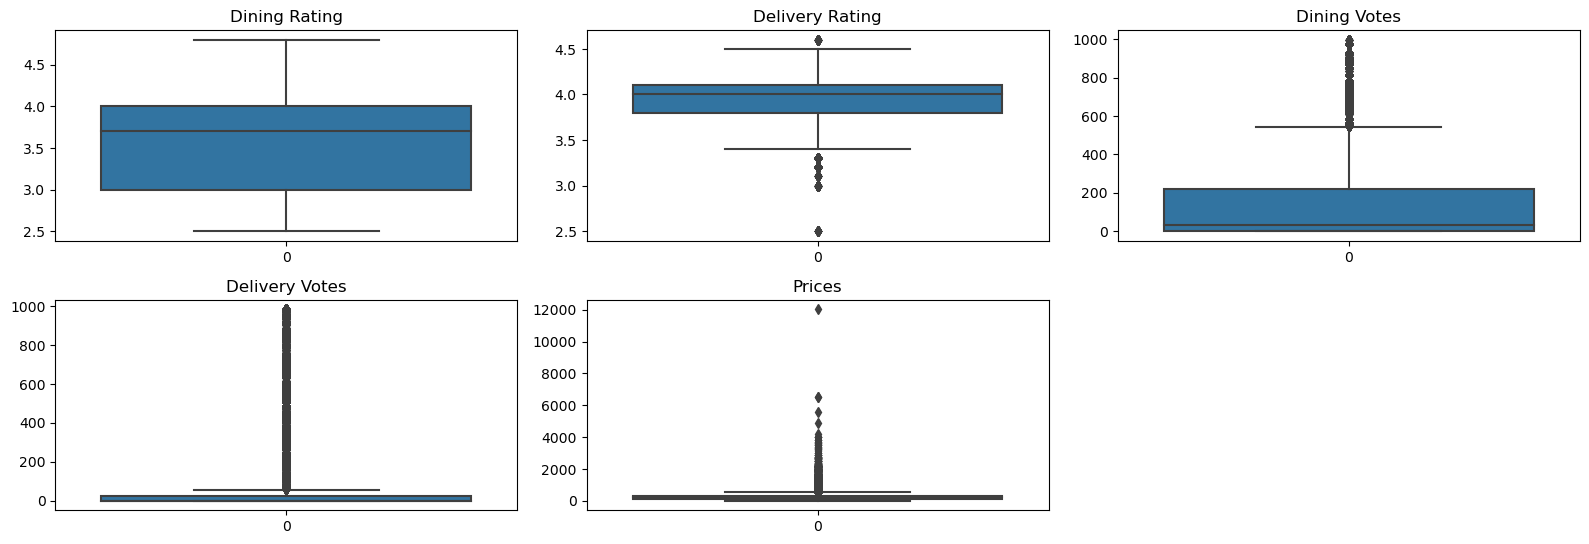

In [ ]:
plt.figure(figsize=(16,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

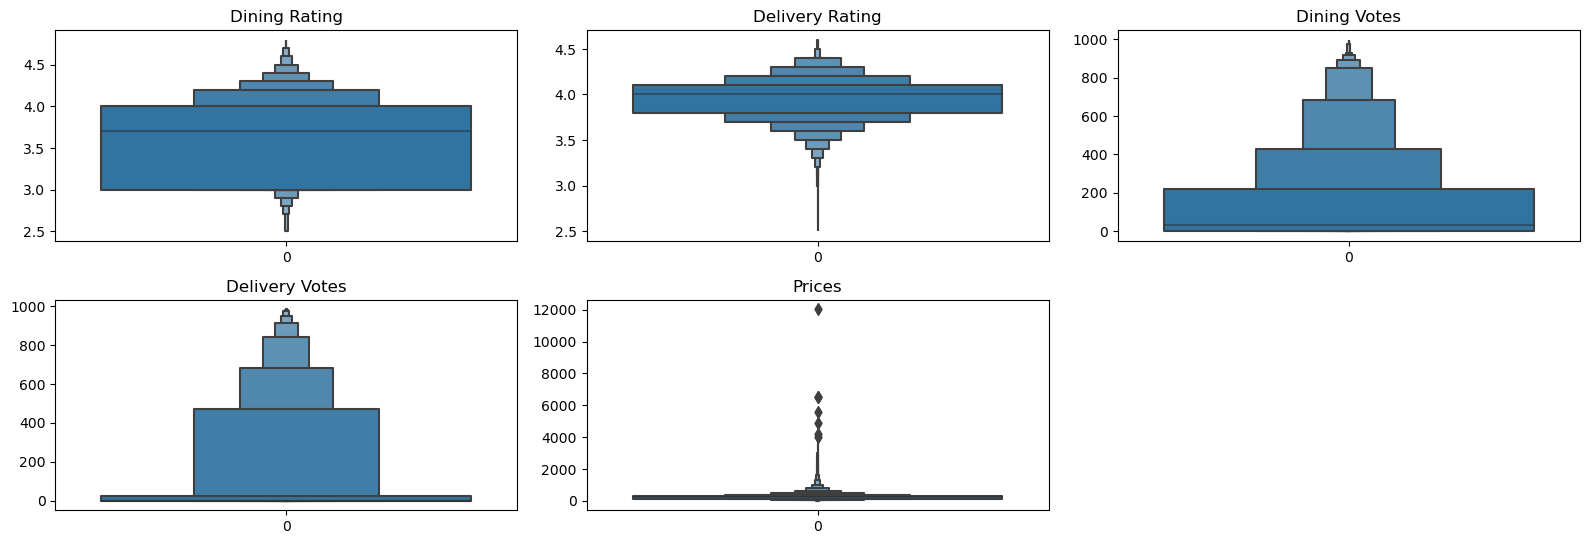

In [ ]:
plt.figure(figsize=(16,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.boxenplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

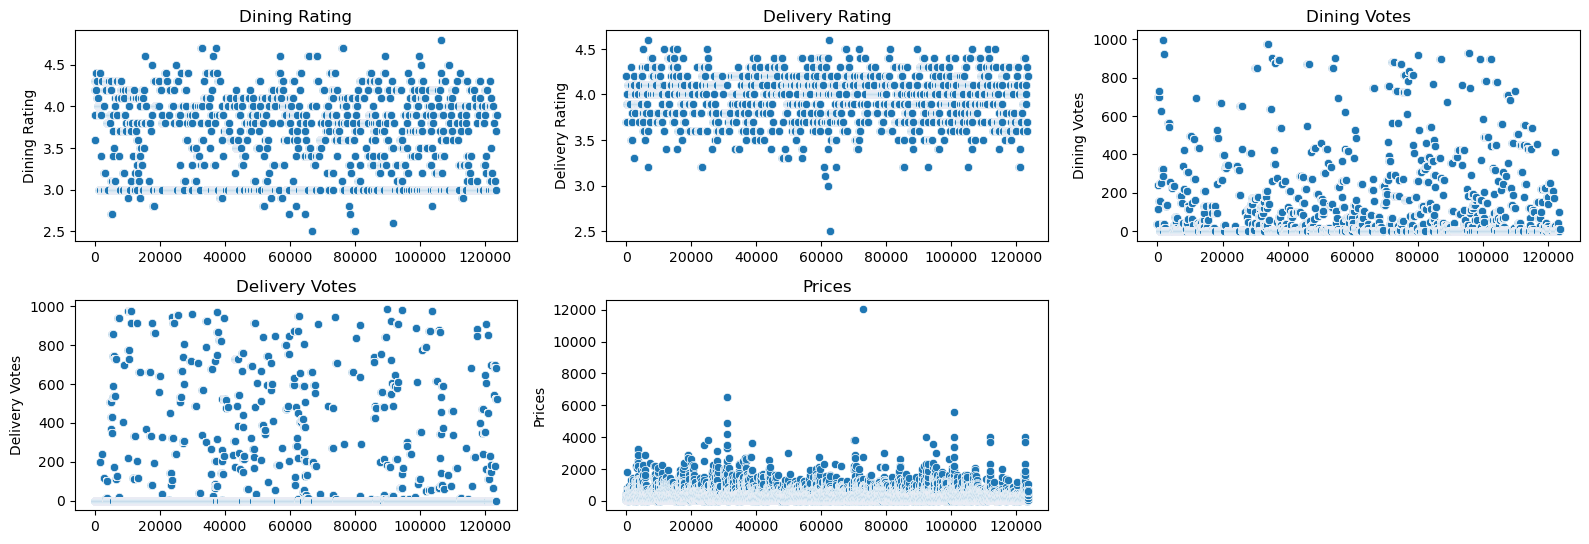

In [ ]:
plt.figure(figsize=(16,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.scatterplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

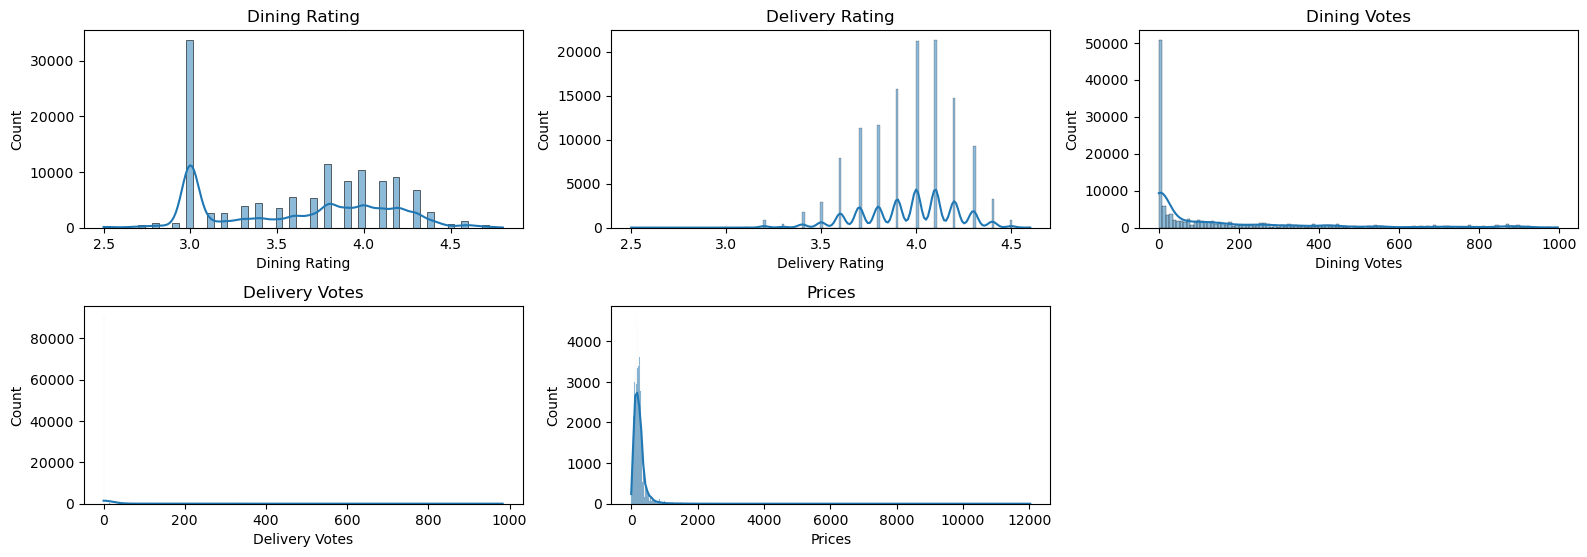

In [ ]:
plt.figure(figsize=(16,8))

for i,var in enumerate(df[num_var]):
    plt.subplot(3,3,i+1)
    sns.histplot(df[var],kde=True)
    plt.title(var)
plt.tight_layout()
plt.show()

In [ ]:
top_20_r=df.sort_values(by='Prices',ascending=False).head(20)

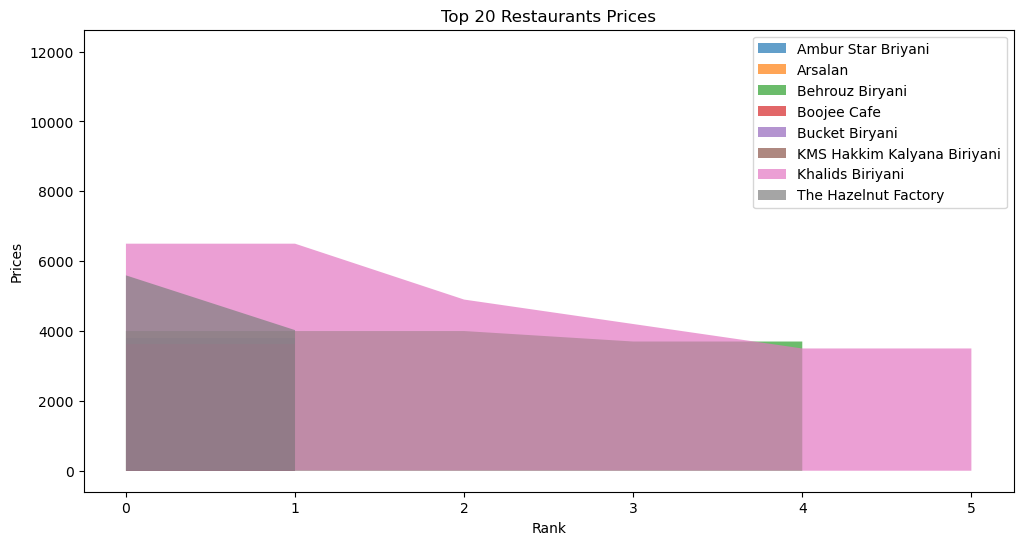

In [ ]:
# Sort the DataFrame by 'Prices' in descending order
sorted_top_20_r = top_20_r.sort_values(by='Prices', ascending=False)

# Group by 'Restaurant Name' and create a list of prices for each restaurant
grouped_prices = sorted_top_20_r.groupby('Restaurant Name')['Prices'].apply(list)

# Convert the grouped data back to a DataFrame
grouped_df = grouped_prices.reset_index()

# Plot the area plot
plt.figure(figsize=(12, 6))
for idx, row in grouped_df.iterrows():
    plt.fill_between(range(len(row['Prices'])), row['Prices'], alpha=0.7, label=row['Restaurant Name'])

plt.xlabel('Rank')
plt.ylabel('Prices')
plt.title('Top 20 Restaurants Prices')
plt.legend()
plt.show()

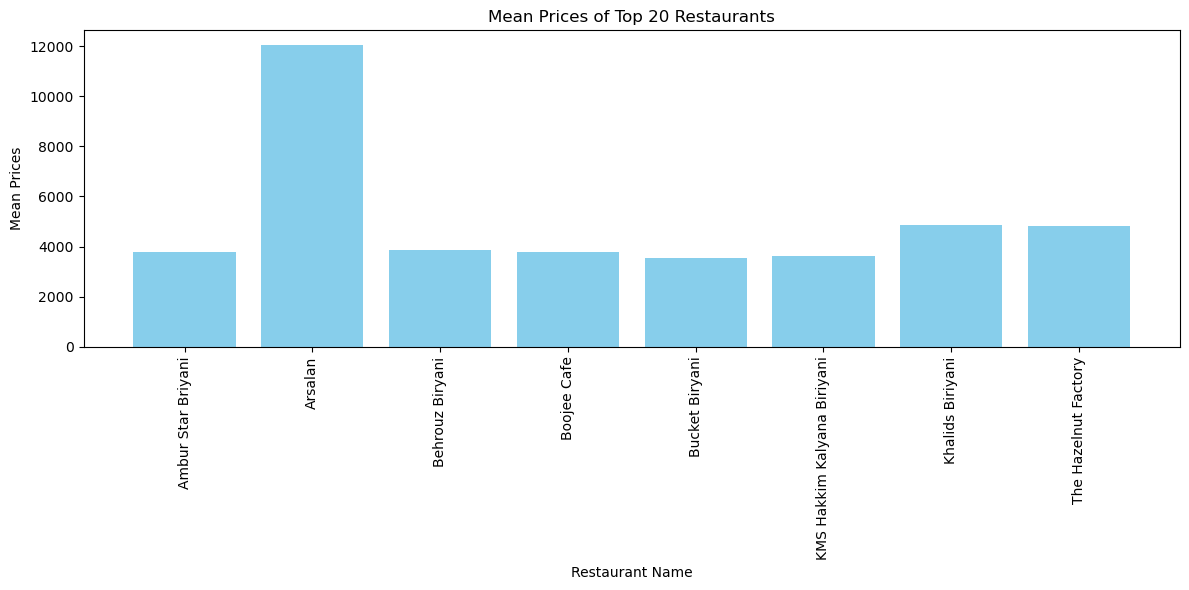

In [ ]:
# Group by 'Restaurant Name' and calculate the mean price for each restaurant
mean_prices = sorted_top_20_r.groupby('Restaurant Name')['Prices'].mean()

# Reset the index to get a DataFrame with 'Restaurant Name' as a column
mean_prices_df = mean_prices.reset_index()
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_df['Restaurant Name'], mean_prices_df['Prices'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Mean Prices')
plt.title('Mean Prices of Top 20 Restaurants')
plt.tight_layout()
plt.show()

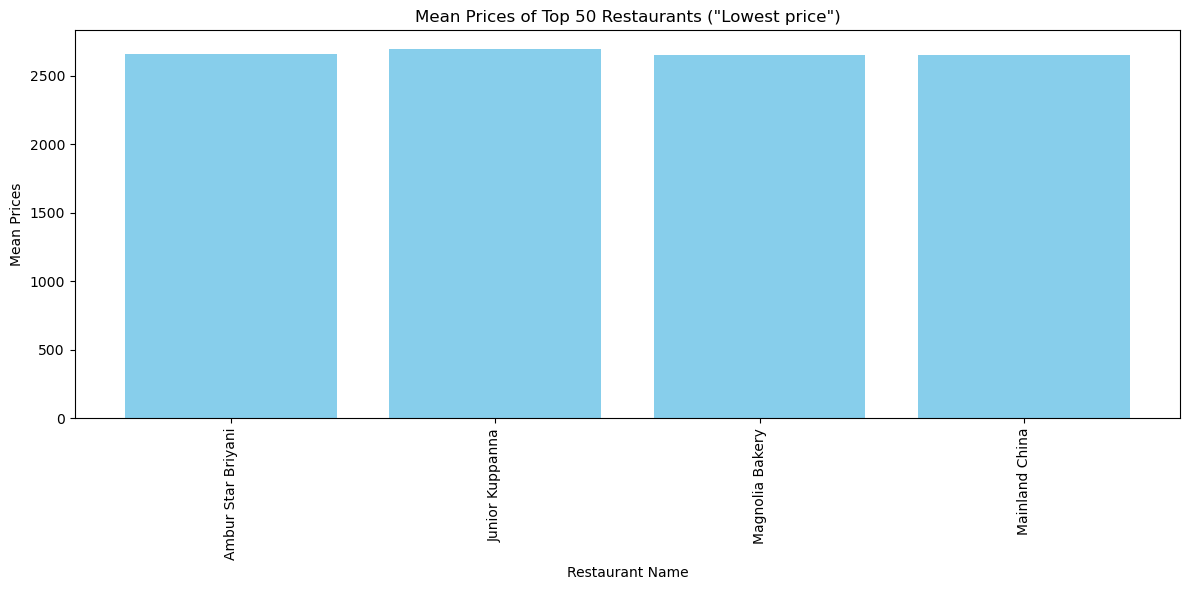

In [ ]:
# Sort the DataFrame by 'Prices' in descending order
sorted_top_20_r = top_20_r.sort_values(by='Prices', ascending=False).tail()

top_20_r=df.sort_values(by='Prices',ascending=False).head(50)
# Group by 'Restaurant Name' and calculate the mean price for each restaurant
mean_prices = sorted_top_20_r.groupby('Restaurant Name')['Prices'].mean()

# Reset the index to get a DataFrame with 'Restaurant Name' as a column
mean_prices_df = mean_prices.reset_index()
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_df['Restaurant Name'], mean_prices_df['Prices'], color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Mean Prices')
plt.title('Mean Prices of Top 50 Restaurants ("Lowest price")')
plt.tight_layout()
plt.show()

In [ ]:
top_20_rating=df.sort_values(by='Dining Rating',ascending=False).head(20)

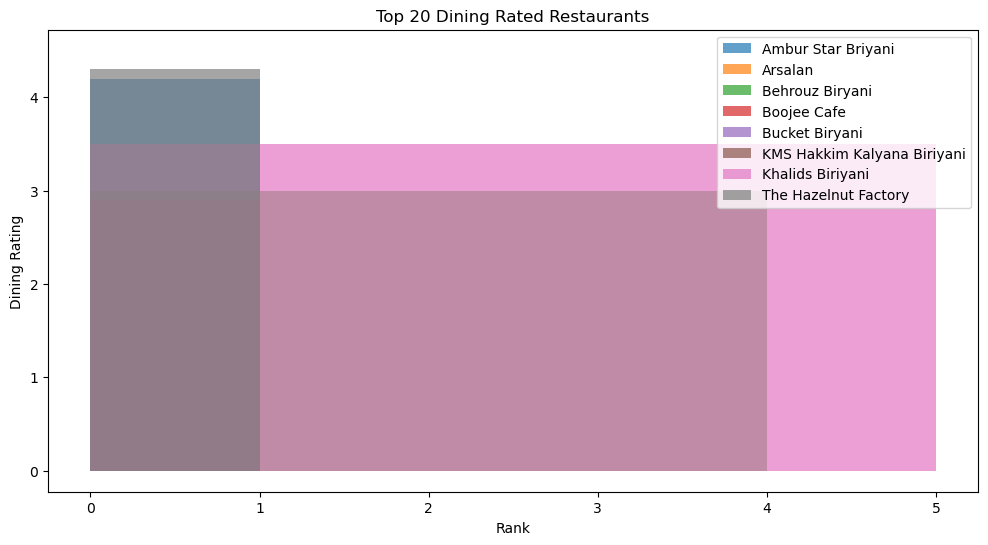

In [ ]:
# Sort the DataFrame by 'Prices' in descending order
sorted_top_20_r = top_20_r.sort_values(by='Dining Rating', ascending=False)

# Group by 'Restaurant Name' and create a list of prices for each restaurant
grouped_prices = sorted_top_20_r.groupby('Restaurant Name')['Dining Rating'].apply(list)

# Convert the grouped data back to a DataFrame
grouped_df = grouped_prices.reset_index()

# Plot the area plot
plt.figure(figsize=(12, 6))
for idx, row in grouped_df.iterrows():
    plt.fill_between(range(len(row['Dining Rating'])), row['Dining Rating'], alpha=0.7, label=row['Restaurant Name'])

plt.xlabel('Rank')
plt.ylabel('Dining Rating')
plt.title('Top 20 Dining Rated Restaurants')
plt.legend()
plt.show()

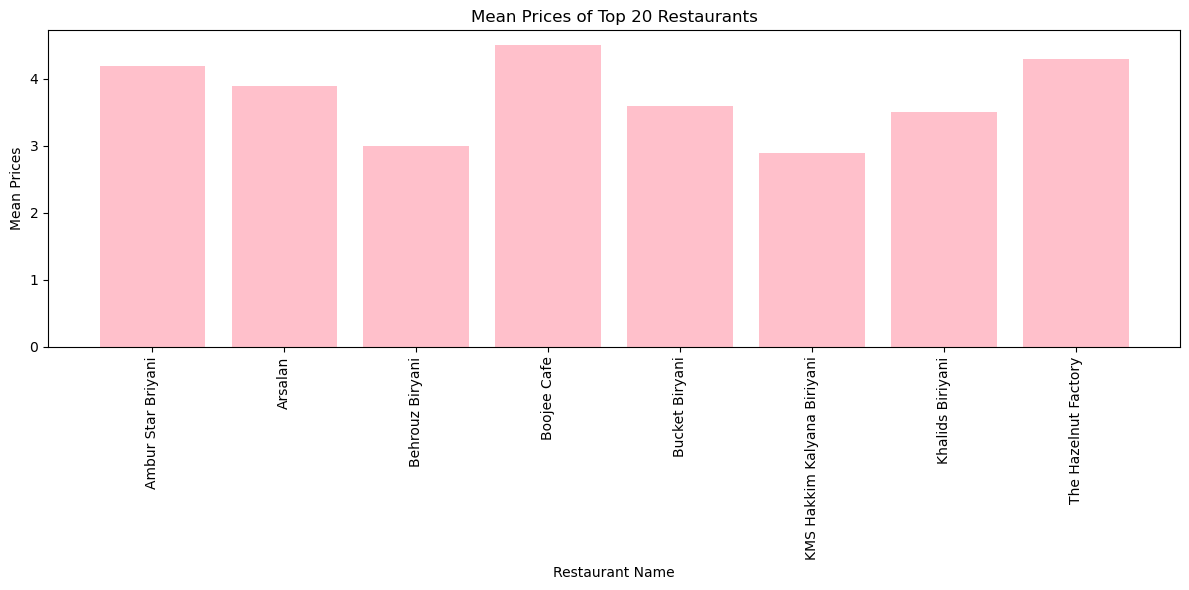

In [ ]:
# Group by 'Restaurant Name' and calculate the mean price for each restaurant
mean_prices = sorted_top_20_r.groupby('Restaurant Name')['Dining Rating'].mean()

# Reset the index to get a DataFrame with 'Restaurant Name' as a column
mean_prices_df = mean_prices.reset_index()
# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_df['Restaurant Name'], mean_prices_df['Dining Rating'], color='pink')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Mean Prices')
plt.title('Mean Prices of Top 20 Restaurants')
plt.tight_layout()
plt.show()

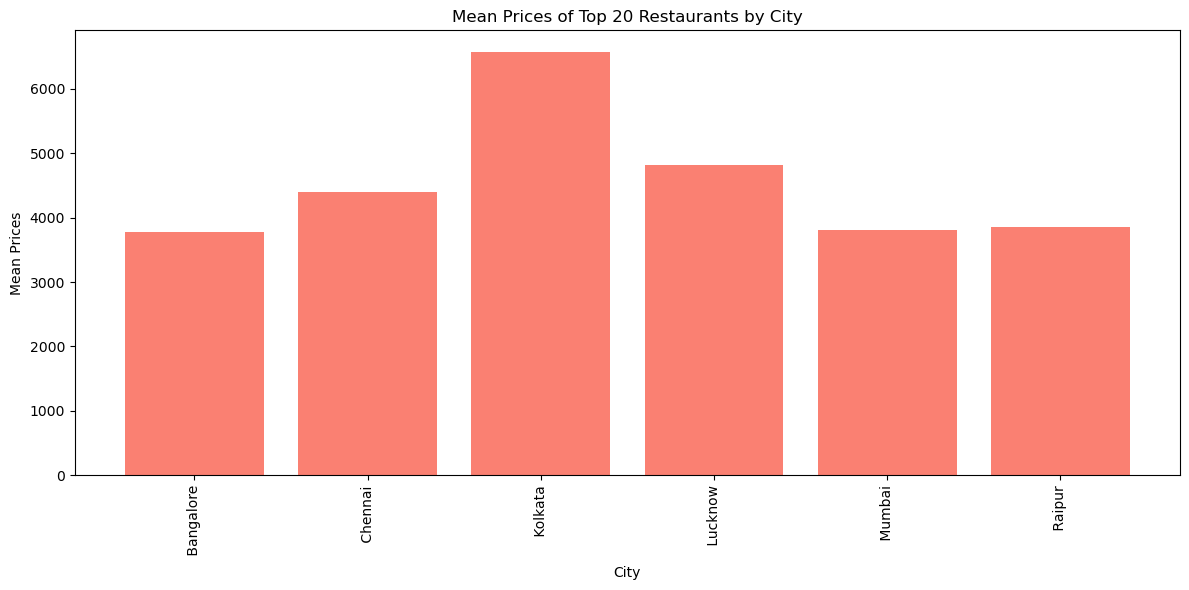

In [ ]:
# Sort the DataFrame by 'Prices' in descending order and select the top 20 rows
top_20_c = df.sort_values(by='Prices', ascending=False).head(20)

# Group by 'City' and calculate the mean price for each city
mean_prices_city_wise = top_20_c.groupby('City')['Prices'].mean()

# Reset the index to get a DataFrame with 'City' as a column
mean_prices_city_wise_df = mean_prices_city_wise.reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_prices_city_wise_df['City'], mean_prices_city_wise_df['Prices'], color='salmon')
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Mean Prices')
plt.title('Mean Prices of Top 20 Restaurants by City')
plt.tight_layout()
plt.show()

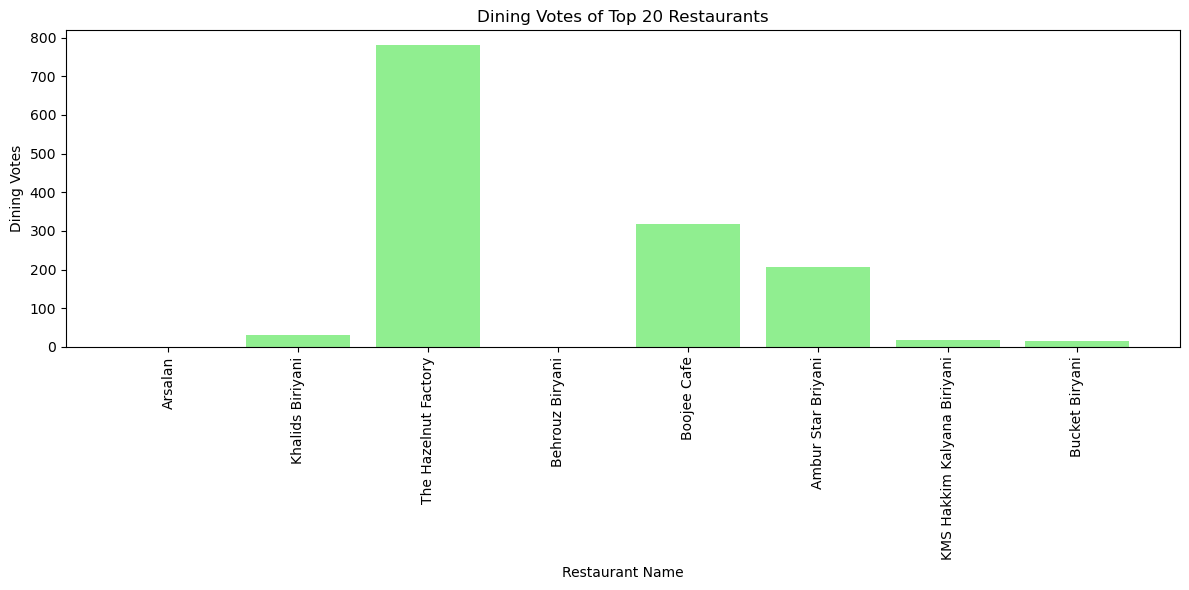

In [ ]:
# Sort the DataFrame by 'Prices' in descending order and select the top 20 rows
top_20_c = df.sort_values(by='Prices', ascending=False).head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_20_c['Restaurant Name'], top_20_c['Dining Votes'], color='lightgreen')
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Dining Votes')
plt.title('Dining Votes of Top 20 Restaurants')
plt.tight_layout()
plt.show()

<Figure size 1600x800 with 0 Axes>

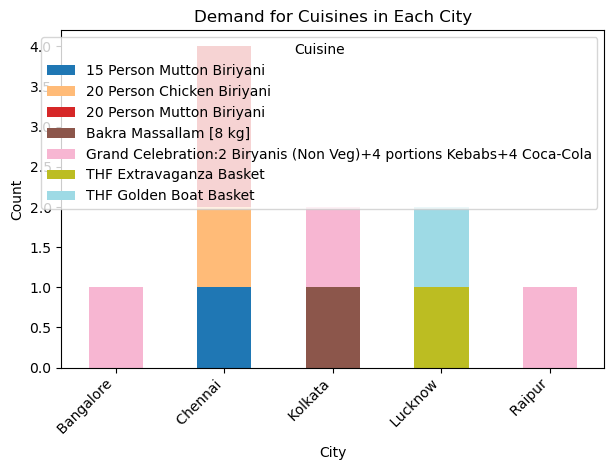

In [ ]:
# Sort the DataFrame by 'Prices' in descending order and select the top 20 rows
top_20_c = df.sort_values(by='Prices', ascending=False).head(10)

# Group by 'City' and 'Cuisine' and calculate the count of each cuisine in each city
cuisine_counts = top_20_c.groupby(['City', 'Item Name']).size().unstack(fill_value=0)

# Create a stacked bar plot
plt.figure(figsize=(16, 8))
cuisine_counts.plot(kind='bar', stacked=True, colormap='tab20')
plt.xticks(rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Demand for Cuisines in Each City')
plt.tight_layout()
plt.legend(title='Cuisine')
plt.show()

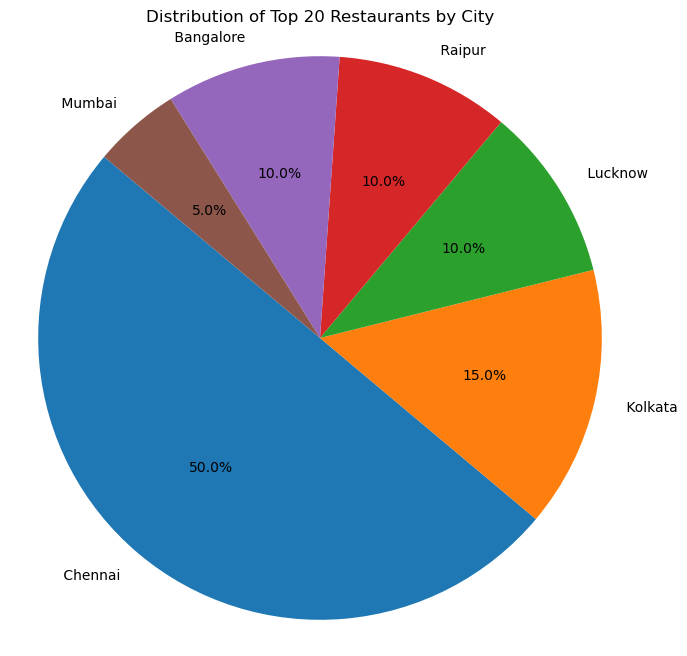

In [ ]:
# Sort the DataFrame by 'Prices' in descending order and select the top 20 rows
top_20_c = df.sort_values(by='Prices', ascending=False).head(20)

# Count the occurrences of each city in the 'City' column
city_counts = top_20_c['City'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Top 20 Restaurants by City')
plt.show()

## Thank All Connections